# Exploratory Data Analysis (EDA) of the Titanic dataset

Data source: https://www.kaggle.com/c/titanic

Goal of this excercise is to try to solve series of tasks which are very similar to the tasks you will face during working on the first (EDA) project in SU.

The idea is that you will take a look at the dataset which you have, probably, no prior knowledge and try to form a few hypotheses (de facto circa 5 questions) about the data and you will try to find an answers to them. 

**It is mandatory to write down your gained insight about each of the hypotheses in your notebook!**

#### Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Import used packages

In [67]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file

In [68]:
df = pd.read_csv('https://homel.vsb.cz/~svo0175/titanic.csv', sep=',')
# df = pd.read_csv('data_exploration/titanic.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [71]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Task 1
**Description:** What percentage of passangers survived in different pclass?

First we need to calculate number of passengers for pclass and survived category.

In [72]:
agg_pclass_survived = df.groupby(['Pclass', 'Survived']).PassengerId.count()
agg_pclass_survived

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

To calculate percentage ration of survivors in different class we need to calculate total for each class before calculation.

For example for first row we would calculate percentage on paper by calculcation $\frac{80}{80+136} = \frac{80}{216} = 0.370$

In [73]:
agg_pclass = df.groupby('Pclass').PassengerId.count()
agg_pclass

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

We let previous variables as type pandas.Series, which include index (first row, indetifier). We can use this index for mathematical calculations :-). Position with matching index will be used for calculation.

In [74]:
agg_pclass_survived / agg_pclass

Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: PassengerId, dtype: float64

In [75]:
df_agg = (agg_pclass_survived / agg_pclass).reset_index(name='Ratio')
df_agg

,Pclass,Survived,Ratio
0,1,0,0.370370
1,1,1,0.629630
2,2,0,0.527174
3,2,1,0.472826
4,3,0,0.757637
5,3,1,0.242363


Lets visualize our result using seaborn.barplot

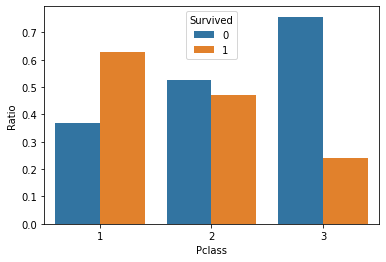

In [76]:
sns.barplot(data=df_agg, x='Pclass', y='Ratio', hue='Survived')

We can notice that higher percentage of survived is in 1st class - over 60%.

**Better visualization can be done in form of stacked bar plot. However, there is no easy way to do this in seaborn. Following is small example from internet for stacked bar plot using Matplotlib.**

<BarContainer object of 3 artists>

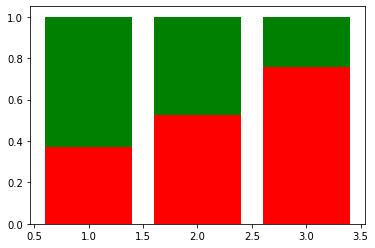

In [77]:
df_sur0 = df_agg[df_agg.Survived==0]
df_sur1 = df_agg[df_agg.Survived==1]
plt.bar(df_sur0.Pclass, df_sur0.Ratio, color='red')
plt.bar(df_sur1.Pclass, df_sur1.Ratio, color='green', bottom=df_sur0.Ratio)

Higher chance for survival had passangers from 1st class.

## Task 2
**Description:** Is there any effect caused by ... on ...?

**Insight gained:** ......

# Did women travel without an adult male companion (and vice versa)

(577, 334, 314, 145)

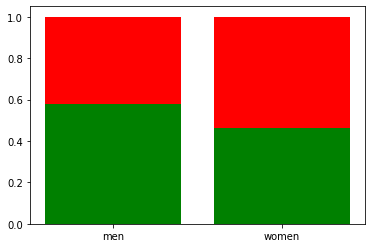

In [78]:
from dataclasses import dataclass


@dataclass
class Person:
    name: str
    age: float
    parch: int
    sex: str
    survived: bool


def parse_last_name(name):
    return name[:name.find(',')]


def to_dict(dataframe):
    names = list(dataframe['Name'])
    parch = list(dataframe['Parch'])
    age = list(dataframe['Age'])
    sex = list(dataframe['Sex'])
    survived = list(dataframe['Survived'])

    result = dict()

    for n, p, a, s, sur in zip(names, parch, age, sex, survived):
        person = Person(name=n, age=a, parch=p, sex=s, survived=sur)
        last_name = parse_last_name(person.name)
        lst = result.get(last_name, [])
        lst.append(person)
        result[last_name] = lst

    return result


def find(rec, sex):
    opposite = ['male', 'female'][sex == 'male']
    total = 0
    for name, family in rec.items():
        determinable = all(map(lambda p: p.sex == sex or (p.sex == opposite and p.age is not None), family))

        if not determinable:
          continue

        adult_desired = sum(map(lambda p: p.sex == sex and p.age >= 18.0, family))
        adult_opposites = any(map(lambda p: p.sex == opposite and p.age >= 18.0, family))
        if not adult_opposites:
            total += adult_desired
    return total


def process(rec):
    return find(rec, 'male'), find(rec, 'female')


def count(rec):
    women = 0
    men = 0
    for name, family in rec.items():
        for person in family:
            men += person.sex == 'male'
            women += person.sex == 'female'
    return men, women


dct = to_dict(df)

total_men, total_women = count(dct)
men_alone, women_alone = process(dct)

men_ratio = men_alone / total_men
women_ratio = women_alone / total_women

plt.bar(['men', 'women'], [men_ratio, women_ratio], color='green')
plt.bar(['men', 'women'], [1 - men_ratio, 1 - women_ratio], color='red', bottom=[men_ratio, women_ratio])

total_men, men_alone, total_women, women_alone


The graph would suggest men travelled alone more than women did. The graph also suggest a surprisingly large number of women travelled alone on the Titanic (at least relative to the sociological situation of those times), however, the dataset is incomplete and we can't really tell much due to missing data.

# Effect of port on ticket price and travel class

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


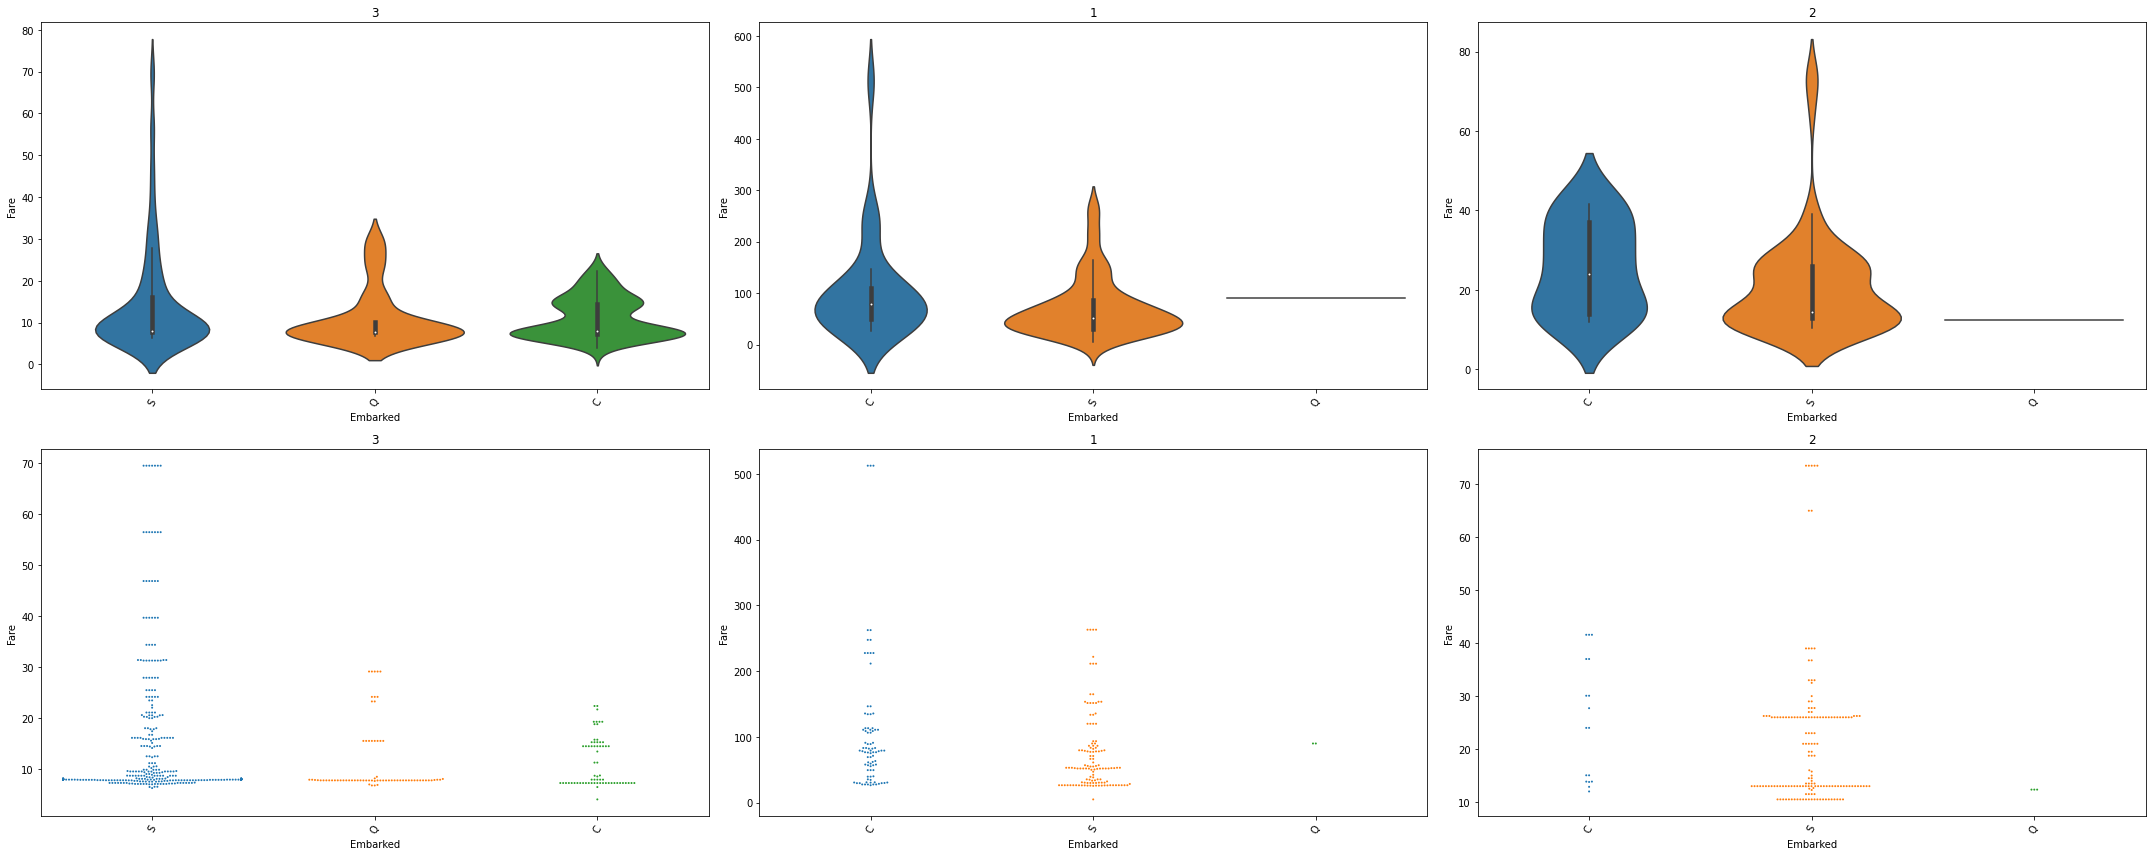

In [79]:
price_known = df[df['Fare'].notna()]
price_known = df[df['Fare'] > 0]

classes = price_known['Pclass'].unique().tolist()

fig, axes = plt.subplots(2, len(classes), figsize=(30, 12))

for i, cls in enumerate(classes):
    filtered = price_known[price_known['Pclass'] == cls]
    ax = fig.axes[i]
    sns.violinplot(data=filtered, x='Embarked', y='Fare', size=2, ax=ax, label=cls).set(title=cls)

    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=60)
        
for i, cls in enumerate(classes):
    idx = 3 + i
    filtered = price_known[price_known['Pclass'] == cls]
    ax = fig.axes[idx]
    sns.swarmplot(data=filtered, x='Embarked', y='Fare', size=2, ax=ax, label=cls).set(title=cls)

    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=60)

fig.tight_layout()

Median price for third class was roughly the same across all ports, however, Southampton saw the sales of both the most and the least expensive tickets.

Only a few first and second class tickets were sold in Queenstown, which
could imply Queenstown is a city with a less affluent population.

Cost of first class tickets varies greatly in Cherbourg. Cherbourg recorded sales of the most expensive first class tickets. Since a rather insignificant
amount of third class tickets was sold in Cherbourg, we can assume the population of Cherbourg was quite wealthy.

The majority of the passengers boarded the vessel in Southampton. Southampton saw a large amount of sales for tickets of all three classes.



# Did family members help one another survive


<BarContainer object of 4 artists>

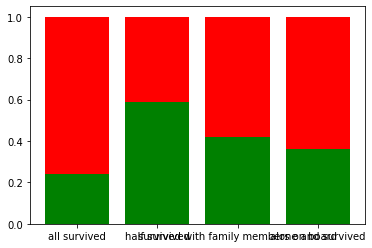

In [80]:
families = {name: family for name, family in dct.items() if len(family) > 1}

non_families = {name: family for name, family in dct.items() if len(family) == 1}

total_pax_with_families_on_board = 0
all_survived = 0
survived_with_family = 0
half_survived = 0
alone_survived = 0

for family in families.values():
    total_pax_with_families_on_board += len(family)
    survived = sum(map(lambda x: x.survived, family))
    survived_with_family += survived
    all_survived += (survived == len(family))
    half_survived += (survived >= len(family)/2)

for family in non_families.values():
    alone_survived += sum(map(lambda x: x.survived, family))

survived_ratio = all_survived / len(families)
survived_with_family_ratio = survived_with_family / total_pax_with_families_on_board
half_survived_ratio = half_survived / len(families)
alone_survived_ratio = alone_survived / len(non_families)

plt.bar(['all survived', 'half survived', 'survived with family members on board', 'alone and survived'], [survived_ratio, half_survived_ratio, survived_with_family_ratio, alone_survived_ratio], color='green')
plt.bar(['all survived', 'half survived', 'survived with family members on board', 'alone and survived'], [1 - survived_ratio, 1 - half_survived_ratio, 1 - survived_with_family_ratio ,1 - alone_survived_ratio], color='red', bottom=[survived_ratio, half_survived_ratio, survived_with_family_ratio, alone_survived_ratio])


Due to the incompleteness of the dataset, we cannot be sure the results are truly accurate, however, the graph suggests very few families survived unharmed,
however, majority of families escaped with half or more family members alive.

By comparing the last two graphs, which display how many people had family members on board and managed to escape, and how many people were travelling alone and survived, we can see the data points slightly in favor of people with families on board. However, the difference is so slight that it may just be
nothing more than noise.

# Correlation between age and travel class

In [81]:
adults = df[df['Age'].notna()]
adults = df[df['Pclass'].notna()]
adults = adults[adults['Age'] >= 18.0]
adults['Pclass'] = 3 - adults['Pclass']

corr = adults['Pclass'].corr(adults['Age'])

corr

0.3577736906895085

There appears to be a slight correlation implying older people are more affluent.

# Effect of age on survival rates

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


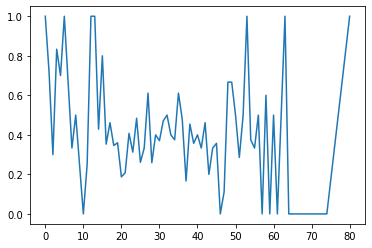

In [82]:
survivors = df[df['Age'].notna()]

pax = []

for family in to_dict(survivors).values():
    pax += family

for p in pax:
    p.age = int(p.age)

total = dict()
survived = dict()

for p in pax:
    total[p.age] = total.get(p.age, 0) + 1
    survived[p.age] = survived.get(p.age, 0) + p.survived

ratios = dict()

for age, count in survived.items():
    total_of_age = total[age]
    ratios[age] = count / total_of_age

sns.lineplot([key for key in ratios.keys()], [value for value in ratios.values()])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


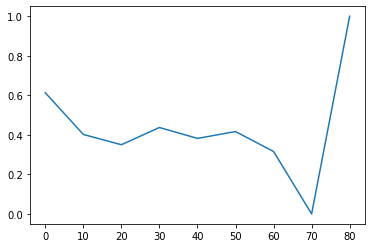

In [83]:

total = dict()
survived = dict()

for p in pax:
    adj_age = (p.age // 10) * 10
    total[adj_age] = total.get(adj_age, 0) + 1
    survived[adj_age] = survived.get(adj_age, 0) + p.survived

ratios = dict()

for age, count in survived.items():
    total_of_age = total[age]
    ratios[age] = count / total_of_age

sns.lineplot([key for key in ratios.keys()], [value for value in ratios.values()])

Children seem to have higher survival rates than adults. Survival rates dropped sharply after the age of 50. There seems to be one odd 80 year old survivor
skewing the graph.

* Effect of age and gender on survival rates
* Difference between ticket prices
* Number m/f travelling w/o a partner
* Effect of port on class and ticket price
* Did family members help one another survive, how many families survived without a single family member dying
* m/f ratio in each travel class
* Correlation between age and travel class